In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import load_model
import pandas as pd
import numpy as np

In [2]:
!wget "https://github.com/HungThinhLuu/OS_KSTN/raw/master/stock_LSTM.zip"

--2022-05-24 14:32:18--  https://github.com/HungThinhLuu/OS_KSTN/raw/master/stock_LSTM.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HungThinhLuu/OS_KSTN/master/stock_LSTM.zip [following]
--2022-05-24 14:32:19--  https://raw.githubusercontent.com/HungThinhLuu/OS_KSTN/master/stock_LSTM.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1481469 (1.4M) [application/zip]
Saving to: ‘stock_LSTM.zip’

stock_LSTM.zip      100%[===================>]   1.41M  --.-KB/s    in 0.08s   

2022-05-24 14:32:19 (17.7 MB/s) - ‘stock_LSTM.zip’ saved [1481469/1481469]



In [3]:
!wget -O "VNI-test.csv" "https://raw.githubusercontent.com/HungThinhLuu/OS_KSTN/master/VNI-test.csv"

--2022-05-24 14:32:28--  https://raw.githubusercontent.com/HungThinhLuu/OS_KSTN/master/VNI-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19521 (19K) [text/plain]
Saving to: ‘VNI-test.csv’

VNI-test.csv        100%[===================>]  19.06K  --.-KB/s    in 0.001s  

2022-05-24 14:32:28 (30.8 MB/s) - ‘VNI-test.csv’ saved [19521/19521]



In [4]:
!unzip "stock_LSTM.zip"

Archive:  stock_LSTM.zip
   creating: stock_LSTM/
   creating: stock_LSTM/assets/
  inflating: stock_LSTM/keras_metadata.pb  
  inflating: stock_LSTM/saved_model.pb  
   creating: stock_LSTM/variables/
  inflating: stock_LSTM/variables/variables.data-00000-of-00001  
  inflating: stock_LSTM/variables/variables.index  


In [5]:
model = load_model('stock_LSTM')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [7]:
data = pd.read_csv("VNI-test.csv", parse_dates=['Date'], index_col='Date').filter(['Price'])
data["Price"] = pd.to_numeric(data["Price"].apply(lambda x: x.replace(",", "")))
data = data.iloc[::-1]
data

,Price
Date,
2021-05-24,1297.98
2021-05-25,1308.58
2021-05-26,1316.70
2021-05-27,1303.57
2021-05-28,1320.46
...,...
2022-05-16,1171.95
2022-05-17,1228.37
2022-05-18,1240.76


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data.values)
scaled_data

array([[0.35340138],
       [0.38312489],
       [0.40589423],
       [0.36907633],
       [0.41643766],
       [0.43772082],
       [0.46500477],
       [0.47341708],
       [0.53931356],
       [0.56670966],
       [0.52389098],
       [0.41481128],
       [0.45132073],
       [0.42518647],
       [0.50415008],
       [0.53213505],
       [0.5479502 ],
       [0.5175537 ],
       [0.52708766],
       [0.57714093],
       [0.56272783],
       [0.58330997],
       [0.57461724],
       [0.58260894],
       [0.61177163],
       [0.65576804],
       [0.66762941],
       [0.66345129],
       [0.68737031],
       [0.69631541],
       [0.67068588],
       [0.5127026 ],
       [0.60736919],
       [0.56847625],
       [0.49125119],
       [0.34869048],
       [0.35216757],
       [0.3027312 ],
       [0.34201671],
       [0.35713084],
       [0.20066177],
       [0.28416802],
       [0.27715776],
       [0.34131569],
       [0.27166171],
       [0.28254164],
       [0.29437496],
       [0.294

In [9]:
x_test = []
y_test = data.values[60:, :]
for i in range(60, len(scaled_data)):
    x_test.append(scaled_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [10]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

26.45005188461684

In [11]:
valid = data[60:]
valid['Predictions'] = predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Price,Predictions
Date,,
2021-08-16,1370.96,1349.475586
2021-08-17,1363.09,1351.831787
2021-08-18,1360.94,1353.218018
2021-08-19,1374.85,1353.583008
2021-08-20,1329.43,1355.757324
...,...,...
2022-05-16,1171.95,1263.754761
2022-05-17,1228.37,1235.620117
2022-05-18,1240.76,1219.038696


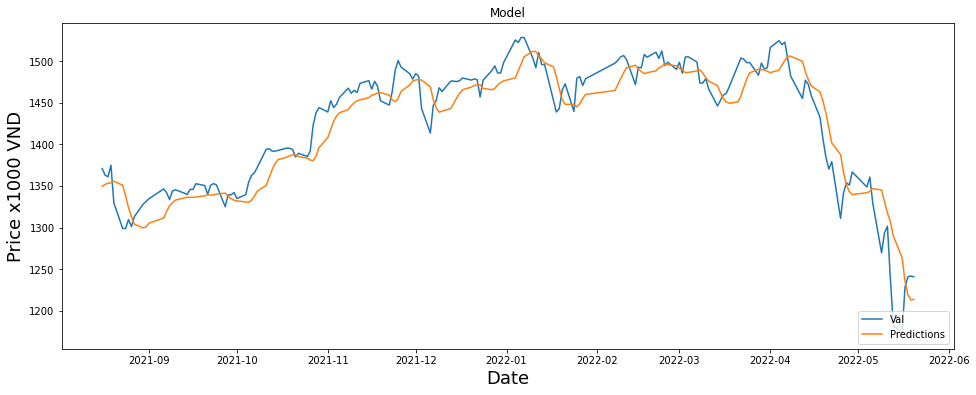

In [12]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()